### 2018 Shared Tasks
#### The general structure is the same as what we used in the logistic regression part but changed the model to support vector classifier, so we don't have many comments here.
#### This part includes the plots for the basic data analysis

In [1]:
import pickle
import re
import collections
import scipy
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import scikitplot as skplt
%matplotlib inline

In [2]:
with open('data_modified.p', 'rb') as fp:
    data = pickle.load(fp)

In [3]:
anx_score = []
for k in data:
    anx_score.append(data[k]['anxiety'])

In [4]:
dict((x,anx_score.count(x)) for x in set(anx_score))

{0.0: 5594,
 1.0: 1945,
 2.0: 876,
 3.0: 404,
 4.0: 213,
 5.0: 144,
 6.0: 96,
 7.0: 72,
 8.0: 56,
 9.0: 26,
 10.0: 19,
 11.0: 5,
 12.0: 5}

In [34]:
data_essay = []
data_anxie = []
data_depre = []
for k in data:
    data_essay.append(data[k]['essay'])
    data_anxie.append(data[k]['anxiety'])
    if data[k]['depression'] == 0:
        data_depre.append(0)
    else:
        data_depre.append(1)
#data_depre.append(data[k]['depression'])

In [6]:
from sklearn.model_selection import train_test_split

In [35]:
words_all = []
for k in data_essay:
    words = re.compile('\w+').findall(k)
    words = [x.lower() for x in words]
    words_all += words
counts = collections.Counter(words_all)

In [36]:
#counts.most_common()[:-21:-1]
counts.most_common(20)

[('go', 21261),
 ('would', 18337),
 ('like', 13796),
 ('work', 12507),
 ('get', 12163),
 ('children', 8541),
 ('home', 8273),
 ('one', 7107),
 ('house', 6748),
 ('time', 6110),
 ('got', 5950),
 ('years', 5681),
 ('name', 5569),
 ('job', 5566),
 ('live', 5550),
 ('old', 5386),
 ('two', 5226),
 ('married', 4740),
 ('going', 4740),
 ('school', 4608)]

In [56]:
top_n_count = [k[0] for k in counts.most_common(2000)]

In [57]:
def feature(datum):
    wor = re.compile('\w+').findall(datum)
    wor = [x.lower() for x in wor]
    cou = collections.Counter(wor)
    # for 20 words
    # feat = [1, cou['go'], cou['would'], cou['like'], cou['work'], cou['get'], cou['children'], cou['home'], cou['one'], cou['house'], cou['time'], cou['got'], cou['years'], cou['name'], cou['job'], cou['live'], cou['old'], cou['two'], cou['married'], cou['going'], cou['school']]
    feat = [1] + [cou[k] for k in top_n_count]
    return feat

In [58]:
new_essay = [feature(datum) for datum in data_essay]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(new_essay, data_depre, test_size=0.33, random_state=42)

In [60]:
clf = SVC(probability=True)

In [61]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
pred_ex = clf.predict(X_test)

In [43]:
pred = clf.predict_proba(X_test)

<Figure size 1152x720 with 0 Axes>

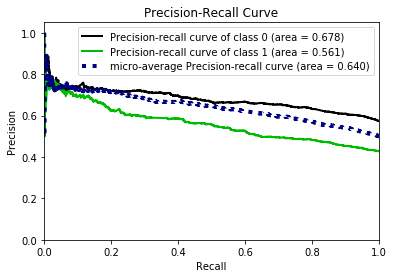

In [51]:
plt.figure(figsize = (16,10))
skplt.metrics.plot_precision_recall(y_test, pred)
#plt.show()
plt.savefig('atta1.png')

<Figure size 1152x720 with 0 Axes>

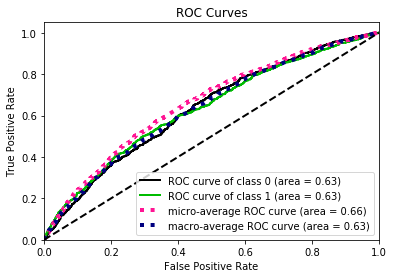

In [52]:
plt.figure(figsize = (16,10))
skplt.metrics.plot_roc(y_test, pred)
plt.savefig('atta2.png', dpi=300)

/home/shulincao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 1152x720 with 0 Axes>

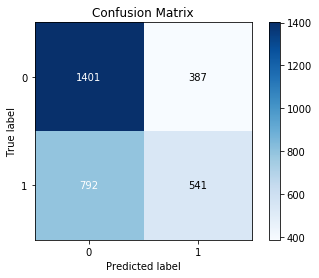

In [55]:
plt.figure(figsize = (16,10))
skplt.metrics.plot_confusion_matrix(y_test, pred_ex, normalize=False)
plt.savefig('atta3.png', dpi=300)

### Data Analysis part

In [29]:
distributi = [[x,anx_score.count(x)] for x in set(anx_score)]

In [31]:
distributi_rate = []
distributi_count = []
for k in distributi:
    distributi_rate.append(k[0])
    distributi_count.append(k[1])

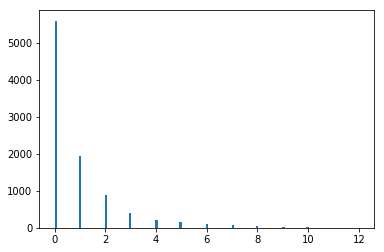

In [33]:

plt.hist(anx_score, bins='auto')  # arguments are passed to np.histogram
plt.show()

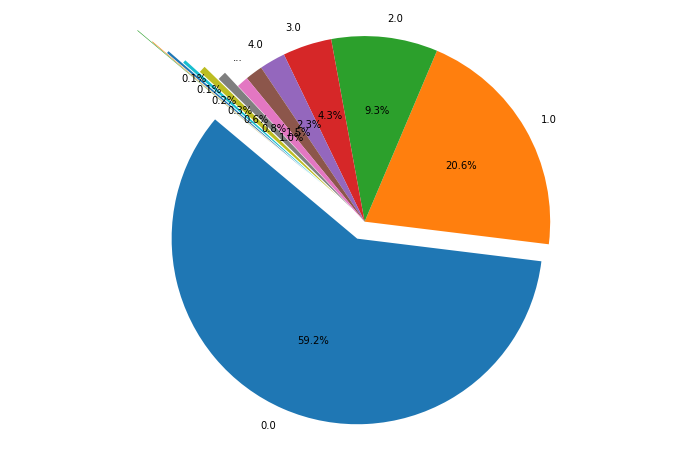

In [49]:
plt.figure(figsize=(12,8))
#labels = '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0'
labels = '0.0', '1.0', '2.0', '3.0', '4.0', '...', '', '', '', '', '', '', ''
sizes = distributi_count
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=140)
 
plt.axis('equal')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'spines'

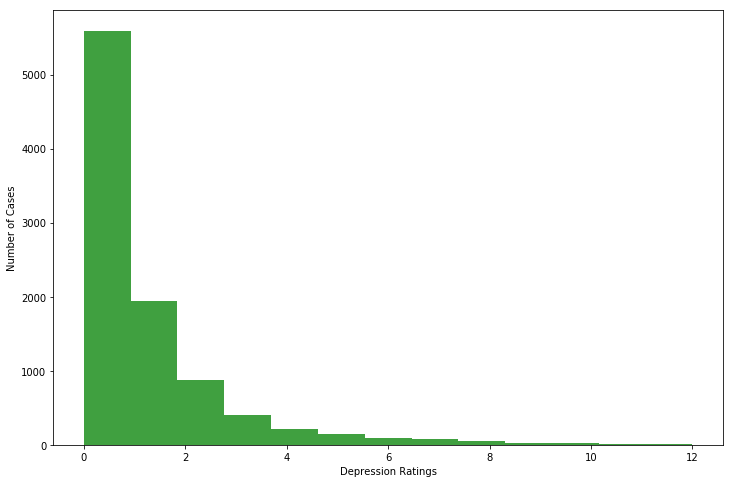

In [50]:
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(anx_score, 13, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Depression Ratings')
plt.ylabel('Number of Cases')

In [53]:
with open('data.p', 'rb') as fp:
    data_raw = pickle.load(fp)

In [55]:
len(data_raw)

10511

In [56]:
top20 = counts.most_common(20)

In [57]:
len(counts)

21097

In [58]:
data['N18166S']

{'essay': 'name name years old married little boy life leading good interests gardening jigsaw making make jigsaw nothing home life interesting sit watch monday watch blue letter work builder build story flat factor school jobs lot others need scaffolding stand get top building go scaffolding get bricks cement sore legs going scaffolding time got good exercise go home fit fiddle dinner come back dinner scaffolding building exercise go weeks wages pocket got week little boy name staying next door labour work train set works battery cost garden quite nice prize dining telling deep green house favoured program comes witch go watch shown left brick one hand last week garden wonted ground soft potatoes cover frost dose get plant onions shots ',
 'anxiety': 1.0,
 'depression': 1.0}

In [60]:
top20_word = [k[0] for k in top20]
top20_count = [k[1] for k in top20]

In [61]:
top20_word

['go',
 'would',
 'like',
 'work',
 'get',
 'children',
 'home',
 'one',
 'house',
 'time',
 'got',
 'years',
 'name',
 'job',
 'live',
 'old',
 'two',
 'married',
 'going',
 'school']

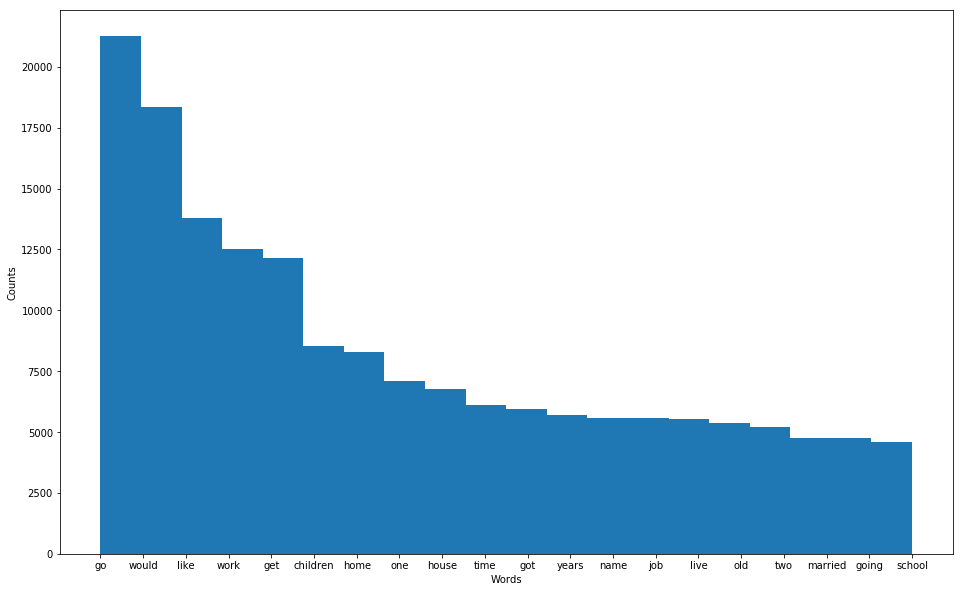

In [69]:
plt.figure(figsize=(16,10))
plt.hist(top20_word,20, weights=top20_count)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

In [71]:
5594/len(data)

0.5916446324695928